In [1]:
import json
import pdal
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource

In [2]:
input_path = "./data/input/09LD1895.las"
output_path = "./data/output/09LD1895_dem.tif"

In [3]:
pipeline_json = {
    "pipeline": [
        {
            "type": "readers.las",
            "filename": input_path
        },
        {
            "type": "filters.smrf",
            "window": 50,
            "slope": 0.2,
            "threshold": 0.45,
            "cell": 1
        },
        {
            "type": "filters.range",
            "limits": "Classification[2:2]"
        },
        {
            "type": "writers.gdal",
            "filename": output_path,
            "output_type": "mean",
            "resolution": 0.5,
            "radius": 1.0,
            "nodata": -9999
        }
    ]
}

In [ ]:
pipeline_definition = json.dumps(pipeline_json)

In [ ]:
pipeline = pdal.Pipeline(pipeline_definition)
pipeline.execute()

1925787

In [ ]:
with rasterio.open(output_path) as src:
    dem_data = src.read(1)
    dem_transform = src.transform

In [ ]:
ls = LightSource(azdeg=315, altdeg=45)
hillshade = ls.hillshade(dem_data, vert_exag=1, dx=1, dy=1)

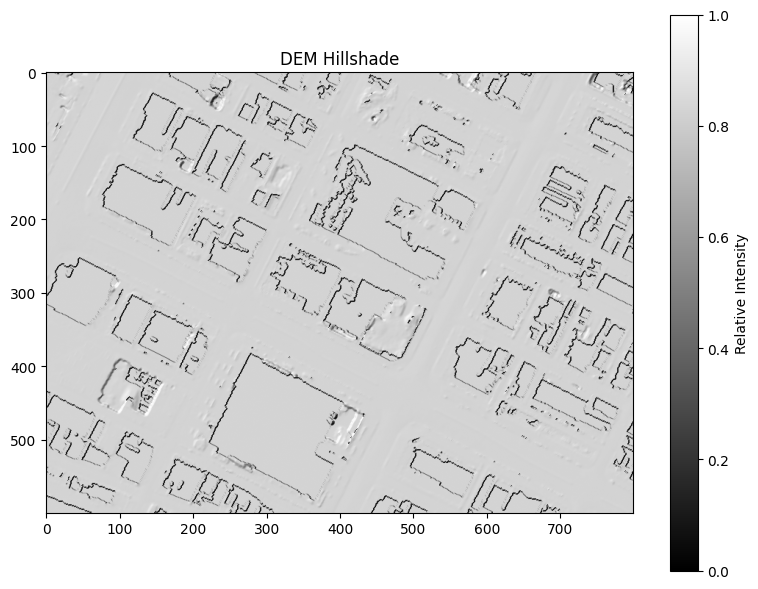

In [8]:
plt.figure(figsize=(8, 6))
plt.title("DEM Hillshade")
plt.imshow(hillshade, cmap='gray')
plt.colorbar(label="Relative Intensity")
plt.tight_layout()
plt.show()